In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import scipy.stats as stats

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('C:/Users/harsh/OneDrive/Desktop/DATA SCIENCE 360 Projects and assigment/Python_casestudy/claims.csv')

In [3]:
cust = pd.read_csv('C:/Users/harsh/OneDrive/Desktop/DATA SCIENCE 360 Projects and assigment/Python_casestudy/cust_demographics.csv')

In [4]:
cust_claim = pd.merge(left = claims , right = cust, how = 'inner', left_on = 'customer_id', right_on = 'CUST_ID')

In [5]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [6]:
cust_claim.claim_id.astype('object')

0       54004764
1       33985796
2       53522022
3       63017412
4       13015401
          ...   
1080    62020796
1081    63269067
1082    22690595
1083    12376894
1084    63226031
Name: claim_id, Length: 1085, dtype: object

In [7]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [8]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [9]:
cust_claim.loc[:,'DateOfBirth'] = pd.to_datetime(cust_claim.DateOfBirth , format = '%d-%b-%y' )

In [10]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   object        
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

In [11]:
cust_claim.claim_date.replace('-','/',inplace=True)

In [12]:
cust_claim.loc[:,'DateOfBirth'] = cust_claim.DateOfBirth.apply(lambda x : np.where(x.year > 2000 , x - pd.DateOffset(years = 100), x))

In [13]:
cust_claim.loc[:,'claim_date'] = pd.to_datetime(cust_claim.claim_date , format='%m/%d/%Y')

In [14]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [15]:
cust_claim.loc[:,'claim_amount'] = cust_claim.claim_amount.astype(str)

In [16]:
cust_claim.loc[:,'claim_amount'] = cust_claim.claim_amount.str.replace('$','')

C:\Users\harsh\AppData\Local\Temp\ipykernel_12680\3084593617.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim.loc[:,'claim_amount'] = cust_claim.claim_amount.str.replace('$','')


In [17]:
cust_claim.loc[:,'claim_amount'] = cust_claim.claim_amount.astype('float64')

In [18]:
cust_claim.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [19]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver


In [20]:
cust_claim.loc[:,'Flag'] = np.where((cust_claim.claim_type == 'Injury only') & (cust_claim.police_report == 'No'), 1,0 )

In [21]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [22]:
cust_claim = cust_claim.drop_duplicates(subset="customer_id", keep= "last")

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cont_var = cust_claim.select_dtypes(['int64','float64'])

In [24]:
cat_var = cust_claim.select_dtypes(['object','datetime64'])

In [25]:
cont_var = cont_var.apply(lambda x : x.fillna(x.mean()))

In [26]:
cont_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1078 non-null   int64  
 1   customer_id          1078 non-null   int64  
 2   claim_amount         1078 non-null   float64
 3   total_policy_claims  1078 non-null   float64
 4   CUST_ID              1078 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 50.5 KB


In [27]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   incident_cause  1078 non-null   object        
 1   claim_date      1078 non-null   datetime64[ns]
 2   claim_area      1078 non-null   object        
 3   police_report   1078 non-null   object        
 4   claim_type      1078 non-null   object        
 5   fraudulent      1078 non-null   object        
 6   gender          1078 non-null   object        
 7   DateOfBirth     1078 non-null   datetime64[ns]
 8   State           1078 non-null   object        
 9   Contact         1078 non-null   object        
 10  Segment         1078 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 101.1+ KB


In [28]:
cust_claim = pd.concat([cont_var,cat_var],axis=1)

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [29]:
cust_claim.loc[:,'Age'] = pd.Timestamp.today().year - cust_claim.DateOfBirth.dt.year

In [30]:
cust_claim.loc[:,'Category'] = np.where(cust_claim.Age < 18 , 'Children',np.where(cust_claim.Age < 30 , 'Youth' , np.where(cust_claim.Age < 60 , 'Adult', 'Senior')))

## 8. What is the average amount claimed by the customers from various segments?

In [31]:
cust_claim.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12846.386178
Platinum    12371.644999
Silver      12267.146560
Name: claim_amount, dtype: float64

## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [32]:
day_prior = pd.Timestamp(day= 1 , month=11 , year=2018) - pd.DateOffset(days = 20)

In [33]:
cust_claim.loc[cust_claim.claim_date < day_prior].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.360374e+05
Driver error          3.481071e+06
Natural causes        1.366169e+06
Other causes          4.077987e+06
Other driver error    3.427568e+06
Name: claim_amount, dtype: float64

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [34]:
adults = cust_claim.loc[(cust_claim.Category == 'Adult'),:]

In [35]:
adults_state = adults.loc[(adults.State =='TX')|(adults.State == 'DE')|(adults.State == 'AK'),:]

In [36]:
adults_state.loc[(adults_state.incident_cause == 'Driver error') | (adults_state.incident_cause == 'Other driver error'),:].claim_id.count()

27

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

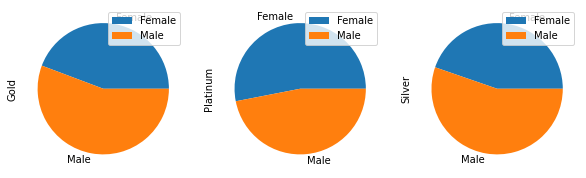

In [37]:
cust_claim.pivot_table(index = 'gender' , columns = 'Segment' , values = 'claim_amount' ,aggfunc = 'sum').plot(kind = 'pie',subplots = True , figsize = (10,20))
plt.show()

In [38]:
cust_claim

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Category
0,54004764,21868593,2980.0,1.0,21868593,Driver error,2017-11-27,Auto,No,Material only,No,Female,1979-01-12,VT,789-916-8172,Platinum,43,Adult
1,33985796,75740424,2980.0,3.0,75740424,Crime,2018-10-03,Home,Unknown,Material only,No,Female,1970-01-13,ME,265-543-1264,Silver,52,Adult
3,63017412,30308357,1950.0,6.0,30308357,Driver error,2018-04-04,Auto,No,Material only,No,Female,1984-03-11,TN,798-631-4758,Silver,38,Adult
5,91609100,47830476,1440.0,1.0,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,No,Female,1986-05-01,MA,413-187-7945,Silver,36,Adult
7,39219616,19269962,2240.0,2.0,19269962,Other causes,2018-09-26,Auto,No,Material only,No,Male,1977-05-13,NV,956-871-8691,Gold,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,1770.0,1.0,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,No,Female,1981-03-15,ND,459-425-4319,Platinum,41,Adult
1081,63269067,42364152,2800.0,1.0,42364152,Other causes,2017-05-09,Home,No,Material only,No,Female,1996-07-07,ID,529-462-1635,Silver,26,Youth
1082,22690595,19888166,33080.0,2.0,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,No,Male,1990-04-11,WI,712-651-9613,Gold,32,Adult
1083,12376894,11256802,2840.0,4.0,11256802,Other driver error,2017-04-18,Auto,No,Material only,No,Female,1964-10-22,LA,469-345-5617,Silver,58,Adult


## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

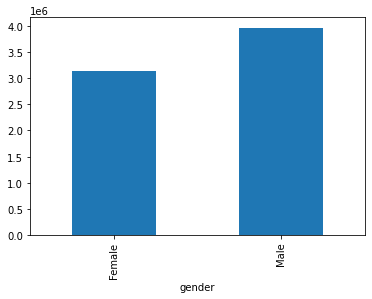

In [39]:
cust_claim.loc[(cust_claim.incident_cause == 'Driver error') | (cust_claim.incident_cause == 'Other driver error'),:].groupby('gender')['claim_amount'].sum().plot(kind = 'bar')
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

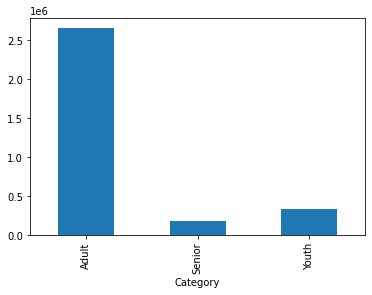

In [40]:
round(cust_claim.loc[cust_claim.fraudulent == 'Yes',:].groupby('Category')['claim_amount'].sum(),2).plot(kind = 'bar')
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

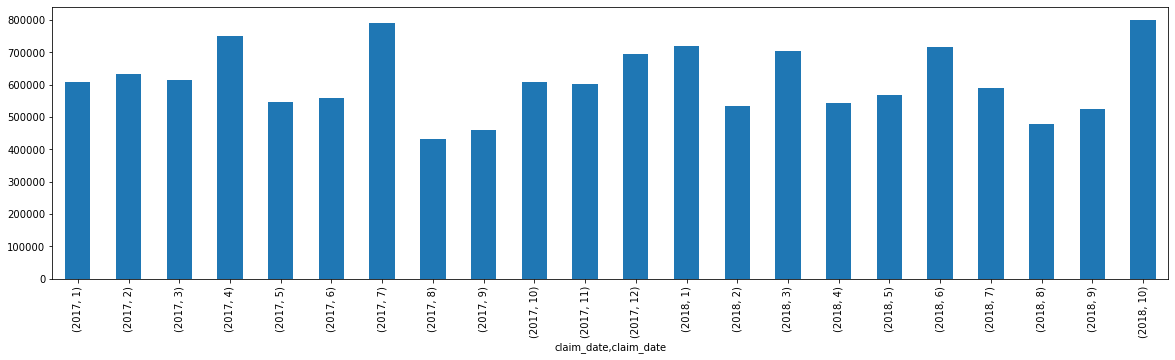

In [41]:
cust_claim.groupby([cust_claim.claim_date.dt.year,cust_claim.claim_date.dt.month])['claim_amount'].sum().plot(kind = 'bar',figsize = (20,5))
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

<AxesSubplot:xlabel='fraudulent,gender,Category'>

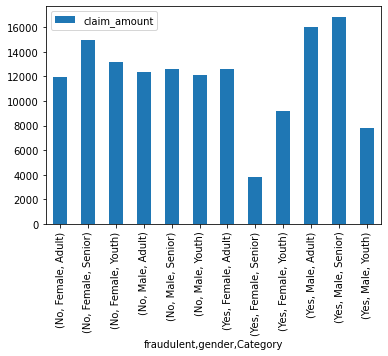

In [71]:
cust_claim.groupby(['fraudulent','gender','Category'])['claim_amount'].mean().plot(kind = 'bar', stacked = True,legend = True)  


In [43]:
cust_claim

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Category
0,54004764,21868593,2980.0,1.0,21868593,Driver error,2017-11-27,Auto,No,Material only,No,Female,1979-01-12,VT,789-916-8172,Platinum,43,Adult
1,33985796,75740424,2980.0,3.0,75740424,Crime,2018-10-03,Home,Unknown,Material only,No,Female,1970-01-13,ME,265-543-1264,Silver,52,Adult
3,63017412,30308357,1950.0,6.0,30308357,Driver error,2018-04-04,Auto,No,Material only,No,Female,1984-03-11,TN,798-631-4758,Silver,38,Adult
5,91609100,47830476,1440.0,1.0,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,No,Female,1986-05-01,MA,413-187-7945,Silver,36,Adult
7,39219616,19269962,2240.0,2.0,19269962,Other causes,2018-09-26,Auto,No,Material only,No,Male,1977-05-13,NV,956-871-8691,Gold,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,1770.0,1.0,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,No,Female,1981-03-15,ND,459-425-4319,Platinum,41,Adult
1081,63269067,42364152,2800.0,1.0,42364152,Other causes,2017-05-09,Home,No,Material only,No,Female,1996-07-07,ID,529-462-1635,Silver,26,Youth
1082,22690595,19888166,33080.0,2.0,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,No,Male,1990-04-11,WI,712-651-9613,Gold,32,Adult
1083,12376894,11256802,2840.0,4.0,11256802,Other driver error,2017-04-18,Auto,No,Material only,No,Female,1964-10-22,LA,469-345-5617,Silver,58,Adult


## 16. Is there any similarity in the amount claimed by males and females?

In [52]:
female_amount = cust_claim.loc[cust_claim.gender == 'Female', 'claim_amount']
male_amount = cust_claim.loc[cust_claim.gender == 'Male', 'claim_amount']

# print mean
print( 'Claim by male ', male_amount.mean(), ' | claim by female: ', female_amount.mean())

# H0: m1 = m2
# Ha: m1 <> m2
    
# CI: 95%
# p : 0.05

# perform the ind sample ttest
print( stats.ttest_ind( male_amount, female_amount))

# As the p_value is high we can't ignore the null hypothesis
# We cann't say that amount claimed by males and females is similar or not.

Claim by male  12884.829631308425  | claim by female:  12100.692029236623
Ttest_indResult(statistic=0.9630529881732577, pvalue=0.3357373087404285)


## 17. Is there any relationship between age category and segment?

In [54]:
# H0: Both are ind.
# Ha: Both are related, associated, dep.
    
# CI: 95%
# p : 0.05

obs_freq = pd.crosstab(cust_claim.Category , cust_claim.Segment)

stats.chi2_contingency(obs_freq)

# As the p_value ius higher we cann't reject the null hypothesis
# So we cann't sat that the age category and segment is related or not.


(0.6654696397990999,
 0.9555179463691874,
 4,
 array([[273.6038961 , 266.22912801, 255.16697588],
        [ 25.81168831,  25.11595547,  24.07235622],
        [ 71.58441558,  69.65491651,  66.7606679 ]]))

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [61]:
# H0: u <= 10,000
# Ha: u > 10,000
    
# CI: 95%
# p : 0.05

cust_claim['year'] = cust_claim.claim_date.dt.year

claim_2017 = cust_claim.loc[cust_claim.year == 2017 , 'claim_amount']

stats.ttest_1samp(claim_2017, 10000)

# As the p_value is low then we can say that null will go.
# we can say that calim_amout is greater than the previous year in current year.

Ttest_1sampResult(statistic=4.20166205214944, pvalue=3.0576290140745054e-05)

## 19. Is there any difference between age groups and insurance claims?

In [64]:
cust_claim.Category.value_counts()

Adult     795
Youth     208
Senior     75
Name: Category, dtype: int64

In [67]:
# H0: Usage is same, samples are from same population, m1 = m2 = m3
# Ha: Usage is different
    
# CI: 95%
# p : 0.05

Adult_amount = cust_claim.loc[cust_claim.Category == 'Adult','claim_amount']
Youth_amount = cust_claim.loc[cust_claim.Category == 'Youth','claim_amount']
Senior_amount = cust_claim.loc[cust_claim.Category == 'Senior','claim_amount']


stats.f_oneway(Adult_amount,Youth_amount,Senior_amount)


# As we can see that p_value is high so we fail to reject the null hypothesis
# So we cann't say that is there any difference between age groups and insurance claims.

F_onewayResult(statistic=0.336179804770188, pvalue=0.7145697135859653)

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [68]:
stats.pearsonr(cust_claim.total_policy_claims , cust_claim.claim_amount)

(-0.021900561381465004, 0.47256549705179146)